# (Explore Bike Share Data)
## by (Reham Rafee)

## Preliminary Wrangling

> Our data is about bike share system where data consists of info about trips taken by service's members, their types, their age, their gender, stations of starting and ending trips, duration of trips etc.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [4]:
# descriptive statistics for numeric variables
print(df.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.00000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

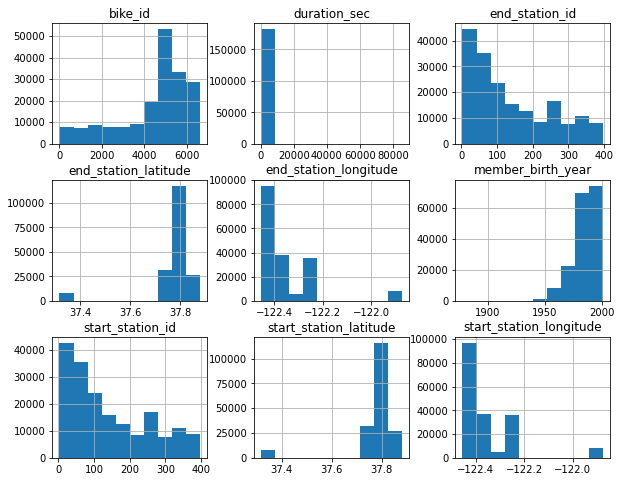

In [6]:
df.hist(figsize = (10, 8));

In [7]:
#Counting Missing Data
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
#Prepare a NaN tabular data
# Let's drop the column that do not have any NaN/None values
na_counts = df.drop(['duration_sec', 'start_time', 'end_time', 'start_station_latitude', 'start_station_longitude', 'start_station_longitude', 'end_station_latitude','end_station_longitude', 'bike_id', 'user_type','bike_share_for_all_trip'], axis=1).isna().sum()
print(na_counts)

start_station_id       197
start_station_name     197
end_station_id         197
end_station_name       197
member_birth_year     8265
member_gender         8265
dtype: int64


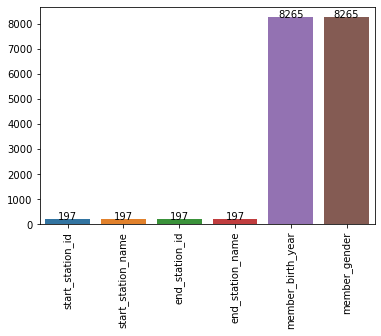

In [9]:
#Plot the bar chart from the NaN tabular data, and also print values on each bar
sb.barplot(na_counts.index.values, na_counts)

# get the current tick locations and labels
plt.xticks(rotation=90) 

# Logic to print value on each bar
for i in range (na_counts.shape[0]):
    count = na_counts[i]

    # Refer here for details of the text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
    plt.text(i, count+300, count, ha = 'center', va='top')

First, we will perform some cleaning 

In [10]:
### first we will make a copy to perform the cleaning process on
df_clean = df.copy()

In [11]:
# dealing with the null values in member_birth_year
df_clean['member_birth_year'].fillna(df_clean['member_birth_year'].mean())

0         1984.000000
1         1984.806437
2         1972.000000
3         1989.000000
4         1974.000000
             ...     
183407    1996.000000
183408    1984.000000
183409    1990.000000
183410    1988.000000
183411    1989.000000
Name: member_birth_year, Length: 183412, dtype: float64

In [12]:
df_clean['start_station_name'].dropna(inplace=True)

In [13]:
df_clean['start_station_id'].dropna(inplace=True)

In [14]:
df_clean['end_station_name'].dropna(inplace=True)

In [15]:
df_clean['end_station_id'].dropna(inplace=True)

In [16]:
df_clean.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [17]:
df_clean['member_gender'].mode()

0    Male
dtype: object

In [18]:
#dealing with the other value in member_gender
df_clean['member_gender'].replace(['Other'],['Male'], regex=True, inplace = True)

In [19]:
# dealing with the null values in member_gender
df_clean['member_gender'].fillna(df_clean['member_gender'].mode())

0         Male
1          NaN
2         Male
3         Male
4         Male
          ... 
183407    Male
183408    Male
183409    Male
183410    Male
183411    Male
Name: member_gender, Length: 183412, dtype: object

In [20]:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])

In [21]:
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

### What is the structure of your dataset?

> There are 183412 trip in the dataset with 16 features . Most variables are numeric in nature, but the variables start_station_name , end_station_name , and user_type are categorical variables.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in using this features ( start station, end station, member birth year, trip duration, bike id, user type, user gender) to predict the expected users and their location where the bike share system usage peak.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think with the usage of the duration of the trip valuable we can explore the duratuion of the trip and its relation with the provided location where the trips strated and ended and  with the informations provided about the users we can reach to some predictions  also about the place and users that the bike share program interset them the most.

I will also use feature engineering to extract data from start and end time columns as:
  * hour
  * day

##  Feature Engineering:

In [22]:
# Extracting hour from start_time column
df_clean['trip_hour_start'] = df_clean['start_time'].dt.hour

In [23]:
# Extracting month from end_time column
df_clean['trip_hour_end'] = df_clean['end_time'].dt.hour

In [24]:
# dividing the day in different parts
def f(x):
    if (x > 4) and (x <= 12):
        return 'morning'
    elif (x > 12) and (x <= 18):
        return'noon'
    elif (x > 18) and (x <= 24):
        return'night'
    elif (x <= 4):
        return'late_night'

In [25]:
df_clean['day_part_start'] = df_clean['trip_hour_start'].apply(f)

In [26]:
df_clean['day_part_end'] = df_clean['trip_hour_end'].apply(f)

In [27]:
# Extracting day from end_time column
df_clean['trip_day_start'] = df_clean['start_time'].dt.strftime("%A")

In [28]:
# Extracting day from end_time column
df_clean['trip_day_end'] = df_clean['end_time'].dt.strftime("%A")

In [29]:
#test
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_hour_start,trip_hour_end,day_part_start,day_part_end,trip_day_start,trip_day_end
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,17,8,noon,morning,Thursday,Friday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,NaN,NaN,No,18,6,noon,morning,Thursday,Friday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,12,5,morning,morning,Thursday,Friday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Male,No,17,4,noon,late_night,Thursday,Friday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,23,0,night,late_night,Thursday,Friday


## Univariate Exploration

>I'll start by looking at the distribution  of one of the main variable of interest: duration

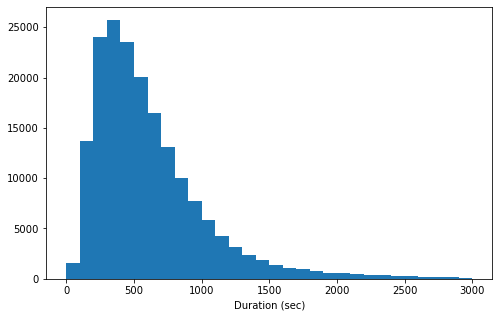

In [30]:
# start with a standard-scaled plot
binsize = 100
bins = np.arange(0, 3000+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (sec)')
plt.show()

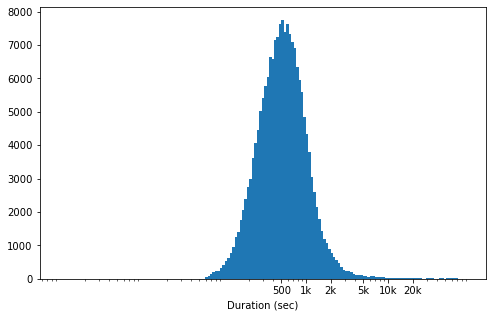

In [31]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.03
bins = 10 ** np.arange(0, np.log10(df_clean['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Duration (sec)')
plt.show()

> * there is an extreme outlier in the duration of the trip that needs to be corrected in order for better visualizing

In [32]:
# dealing with the outliers values in duration
q1 = df_clean['duration_sec'].quantile(0.99)
q1

3458.889999999985

In [33]:
df_clean = df_clean[df_clean['duration_sec'] < q1]

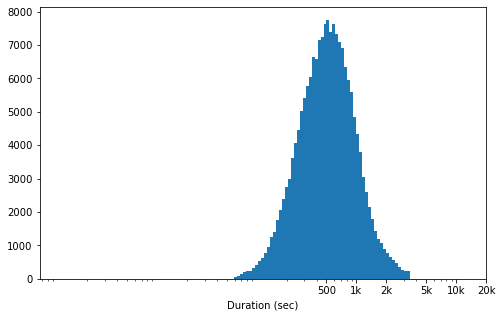

In [34]:
# replotting
log_binsize = 0.03
bins = 10 ** np.arange(0, np.log10(df_clean['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Duration (sec)')
plt.show()

duration has a long-tailed distribution, with a lot of trips takes less than 1000 second. When plotted on a log-scale, the duration distribution looks unimodal, with one peak between 500 and 1000.

Next up, the first predictor variable of interest: start station name.

In [35]:
df_clean['start_station_name'].nunique()

329

> as the number of the unique values of the start station name is so large to be plotted in one plot i will use the value_counts to only plot the top 50 stations

In [36]:

df_top_start = df_clean['start_station_name'].value_counts()[:50].rename_axis('top_start')


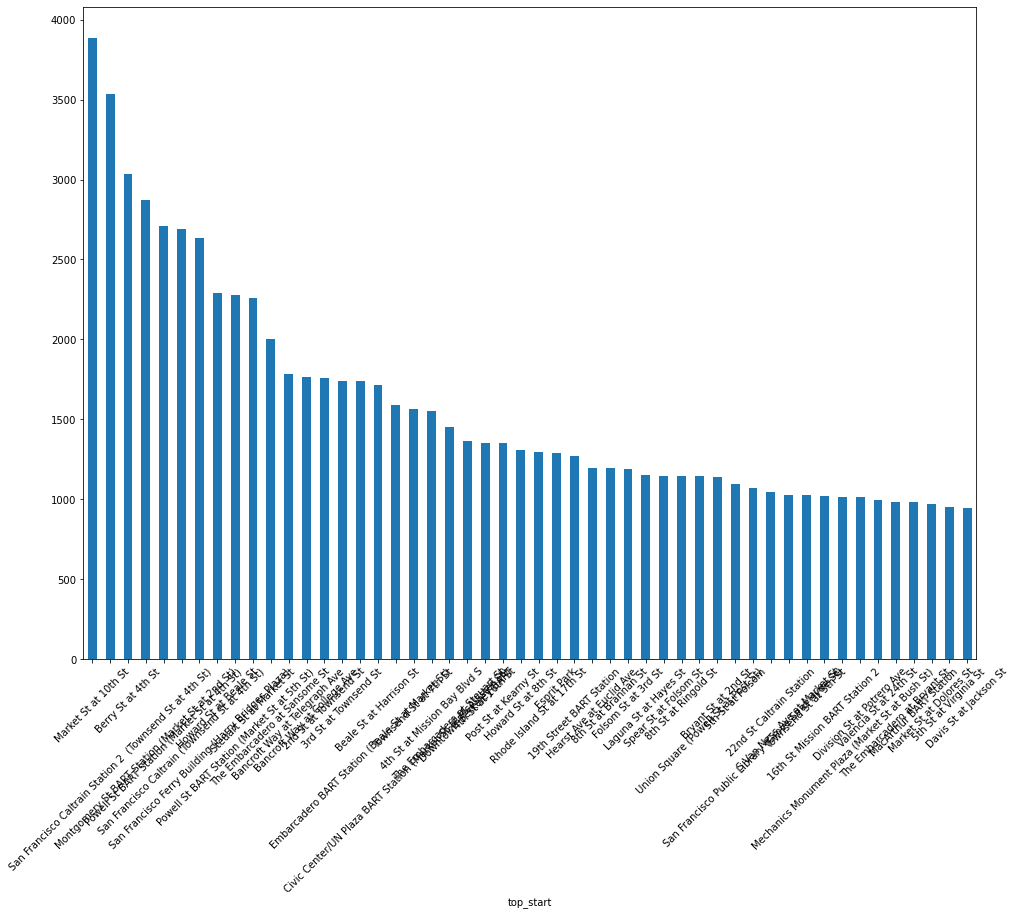

In [71]:

df_top_start.plot.bar(figsize=[16, 12],rot=45);



> Now I will do the same with the end station name 

In [38]:

df_top_end = df_clean['end_station_name'].value_counts()[:50].rename_axis('top_end')

df_top_end

top_end
San Francisco Caltrain Station 2  (Townsend St at 4th St)          4842
Market St at 10th St                                               3961
Montgomery St BART Station (Market St at 2nd St)                   3621
San Francisco Ferry Building (Harry Bridges Plaza)                 3306
Powell St BART Station (Market St at 4th St)                       2963
San Francisco Caltrain (Townsend St at 4th St)                     2940
Berry St at 4th St                                                 2856
The Embarcadero at Sansome St                                      2434
Steuart St at Market St                                            2328
Powell St BART Station (Market St at 5th St)                       2323
Howard St at Beale St                                              2028
Civic Center/UN Plaza BART Station (Market St at McAllister St)    1849
Beale St at Harrison St                                            1806
Bancroft Way at Telegraph Ave                           

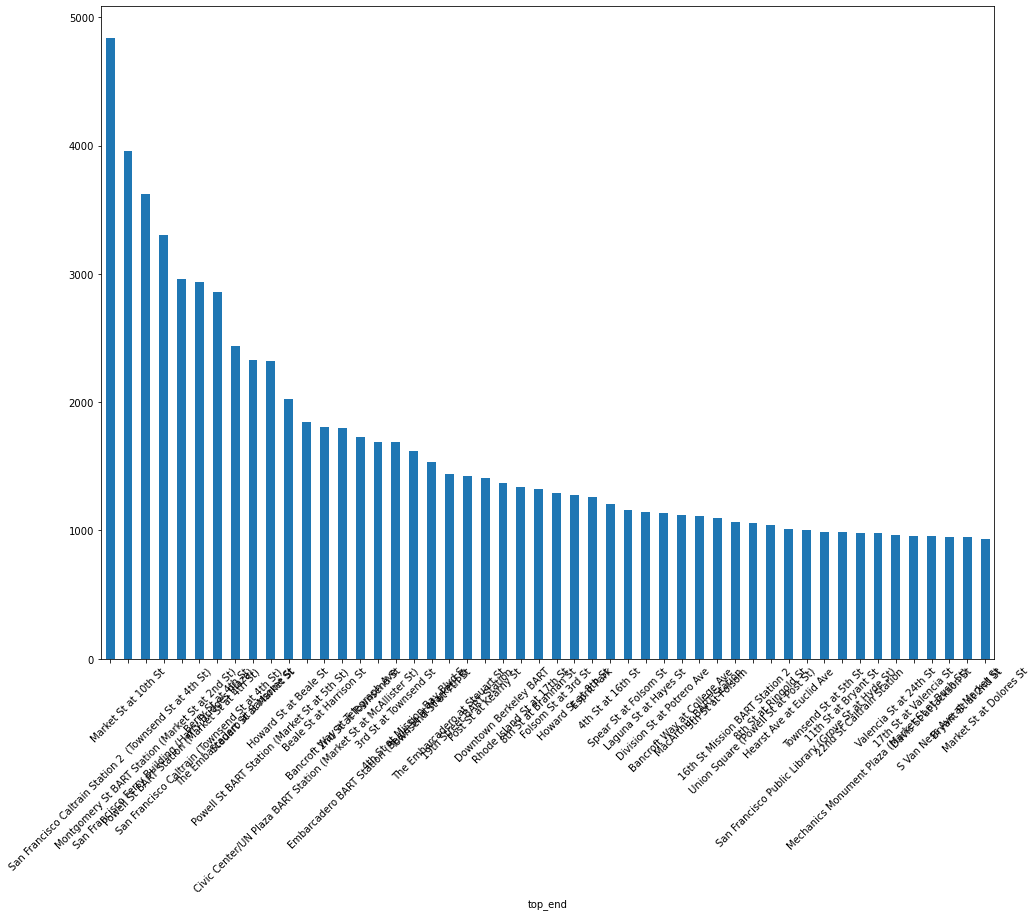

In [39]:
df_top_end.plot.bar(figsize=[16, 12],rot=45)

as it shown in the previous figuers there is some dominant start and stop stations and we will do further explorations in the following steps

Now, lets explore the member birth year

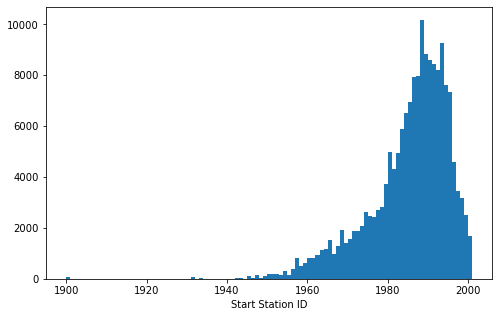

In [40]:
# start with a standard-scaled plot
binsize = 1
bins = np.arange(1900,df_clean['member_birth_year'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'member_birth_year', bins = bins)
plt.xlabel('Start Station ID')
plt.show()

the distribution of the year of birth shows to be right skewed with a right tail and it also shows that their ore couple of outliers with un realstic values that needs to be cleaned

In [41]:
# dealing with the outliers values in member_birth_year

In [42]:
q = df_clean['member_birth_year'].quantile(0.01)
q

1955.0

In [43]:
df_clean = df_clean[df_clean['member_birth_year'] > q]

In [44]:
df_clean['member_birth_year'].min()

1956.0

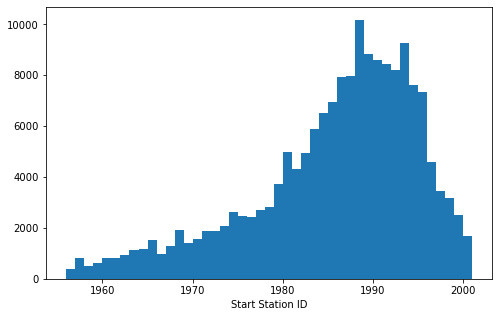

In [45]:
# plotting again after removing the outlier
binsize = 1
bins = np.arange(1956,df_clean['member_birth_year'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'member_birth_year', bins = bins)
plt.xlabel('Start Station ID')
plt.show()

let's explore the member gender variable

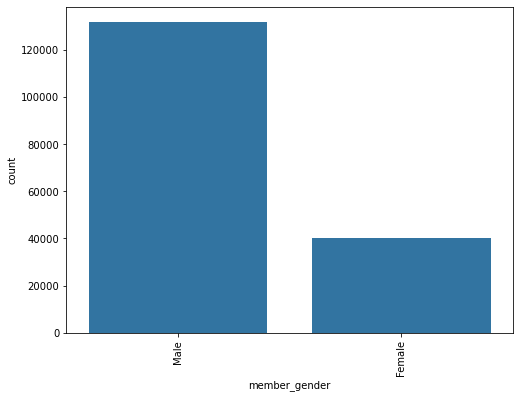

In [46]:
default_color = sb.color_palette()[0]
plt.figure(figsize=[8, 6])
sb.countplot(data = df_clean, x = 'member_gender', color = default_color)
# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90);

>from the member gender plotting it is obviously that most of the users are male with huge difference 

Now, it is the time to explore the user type variable

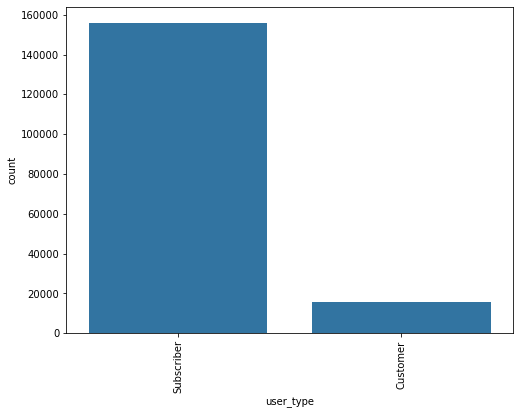

In [47]:
default_color = sb.color_palette()[0]
plt.figure(figsize=[8, 6])
sb.countplot(data = df_clean, x = 'user_type', color = default_color)
# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90);

> again a  clear observation that most of the user type are subscriber

exploring the trip_day_start column

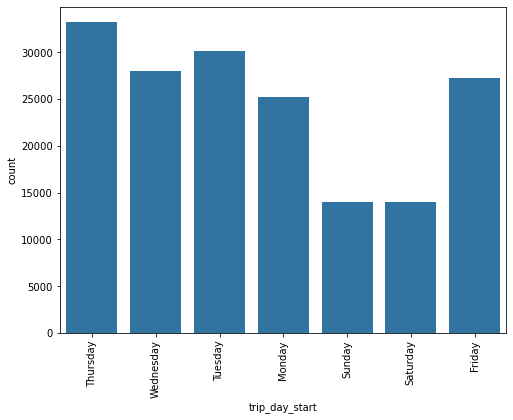

In [48]:
default_color = sb.color_palette()[0]
plt.figure(figsize=[8, 6])
sb.countplot(data = df_clean, x = 'trip_day_start', color = default_color)
# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90);

the start of trips is the least during weekend

exploring the trip_day_end column

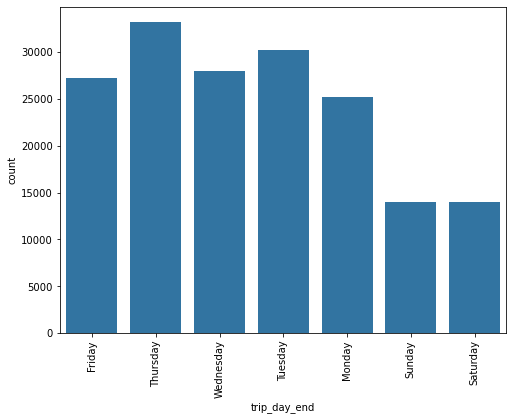

In [49]:
default_color = sb.color_palette()[0]
plt.figure(figsize=[8, 6])
sb.countplot(data = df_clean, x = 'trip_day_end', color = default_color)
# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90);

The end trip is least during weakend

> explore part of day for starting and ending of the trip

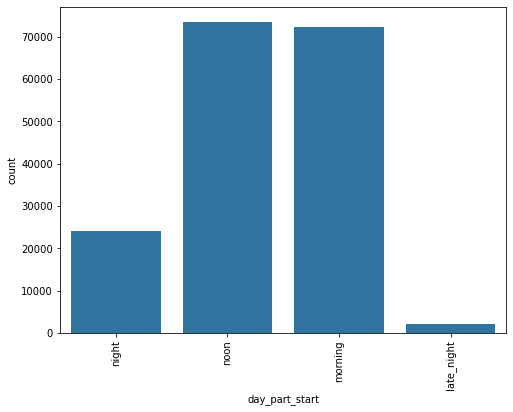

In [50]:
default_color = sb.color_palette()[0]
plt.figure(figsize=[8, 6])
sb.countplot(data = df_clean, x = 'day_part_start', color = default_color)
# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90);

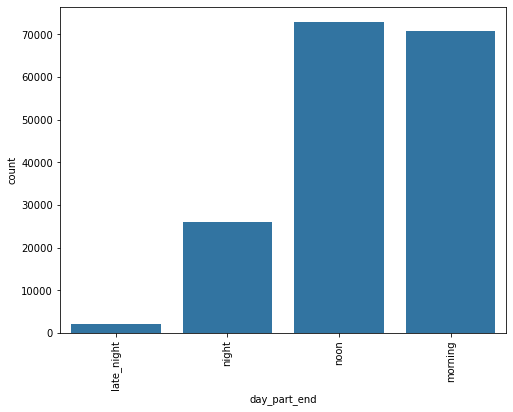

In [51]:
default_color = sb.color_palette()[0]
plt.figure(figsize=[8, 6])
sb.countplot(data = df_clean, x = 'day_part_end', color = default_color)
# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90);

most trips start and end during noon and morning part of day

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In exploring the year of birth of users the distribution shows to be right skewed with a right tail and it also shows that their ore couple of outliers with un realstic values that needs to be cleaned

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, in the year of birth i needed to perform some cleaning process and dropping outliers and after that it shows clearly that most of users year of birth falls between 1985- 2000

## Bivariate Exploration


To start off with, I want to look at the pairwise correlations present between features in the data.

In [52]:
numeric_vars = ['duration_sec', 'member_birth_year']
categoric_vars = [ 'user_type', 'member_gender', 'day_part_end', 'day_part_start', 'trip_day_start', 'trip_day_end' ]

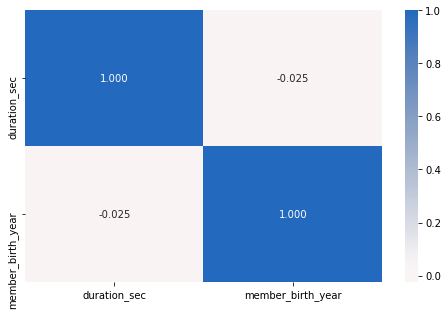

In [53]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

as it shows there is avery weak negative relation ship between our two numeric variables

>Let's move on to looking at how duration and member birth year correlate with the categorical variables.

<Figure size 2160x1440 with 0 Axes>

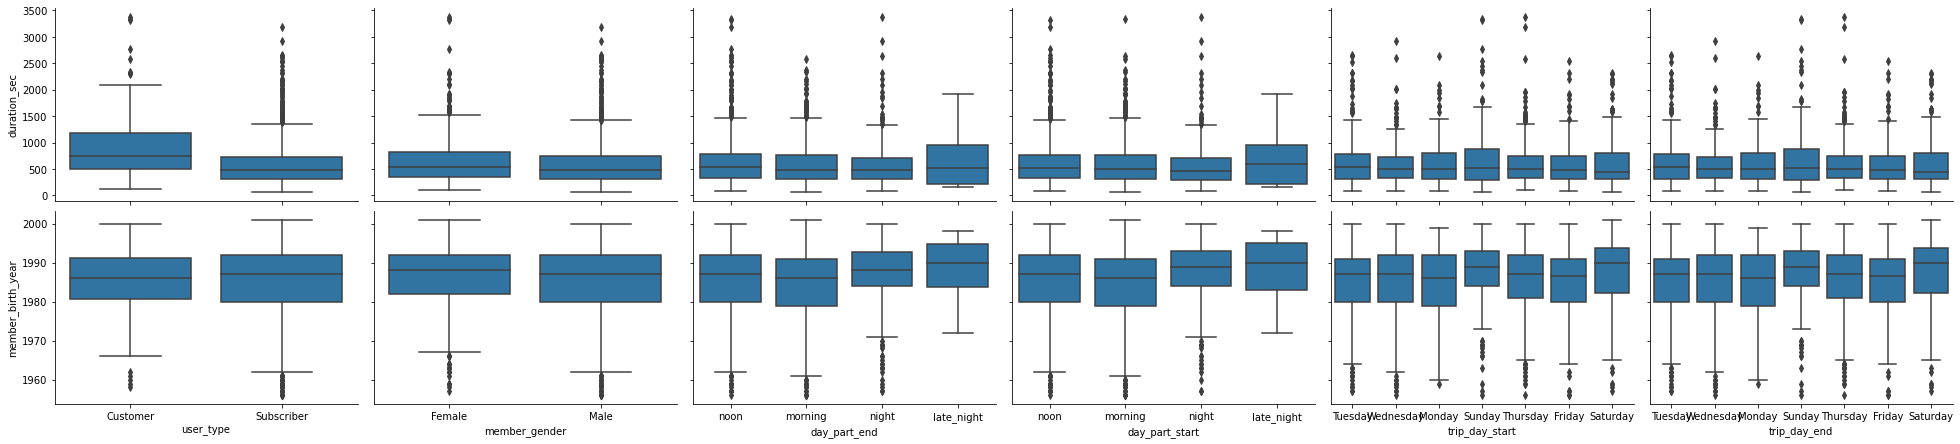

In [54]:
# plot matrix of numeric features against categorical features.

samples = np.random.choice(df_clean.shape[0], 2000, replace = False)
bike_samp = df_clean.reindex(samples)

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [30, 20])
g = sb.PairGrid(data =bike_samp, y_vars = ['duration_sec', 'member_birth_year'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

> * the average trip duration increase in customer type  and in the female users than the subscriber and males users recpectively
  * duration of the trip does not differ significally with the change of the gender 
  * duration of the trip range increase in the late night trips 
  * duration of the trip does not differ significally with the change of the day except  for saturday trips


> * the average age for both the male and female users are close  and also for the both user types
 

For more in depth exploration let's plot between some categorical variables as:
* trip_day_start and gender
* trip_day_start and user_type
* trip_day_start and day_part_start
* trip_end_day and gender
* trip_end_day and user_type
* trip_end_day and day_part_end


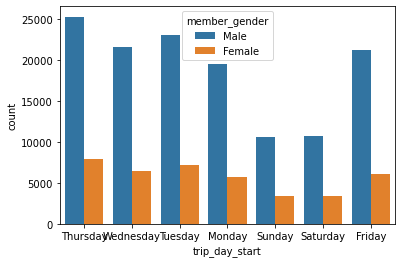

In [55]:
sb.countplot(data = df_clean, x = 'trip_day_start', hue = 'member_gender')

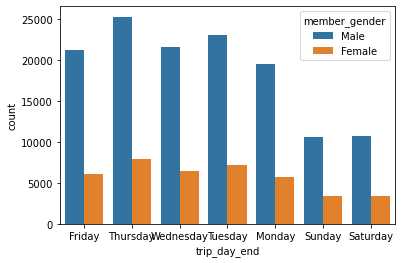

In [56]:
sb.countplot(data = df_clean, x = 'trip_day_end', hue = 'member_gender')

both male and female trips occur the most in thursday and least during weekends

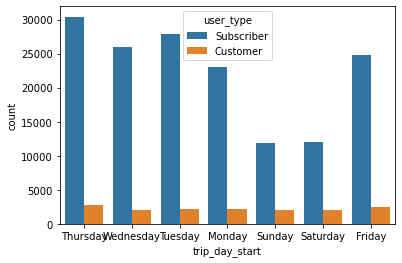

In [57]:
sb.countplot(data = df_clean, x = 'trip_day_start', hue = 'user_type')

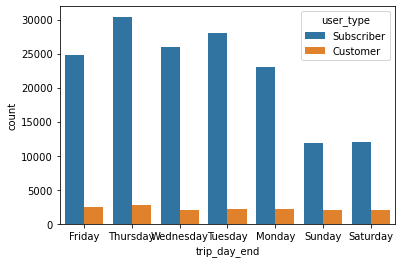

In [58]:
sb.countplot(data = df_clean, x = 'trip_day_end', hue = 'user_type')

customer trips almost constant duting the week unlike the subscribers that peak on tuesday and decrease in weekends

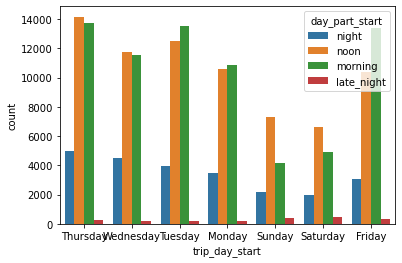

In [59]:
sb.countplot(data = df_clean, x = 'trip_day_start', hue = 'day_part_start')

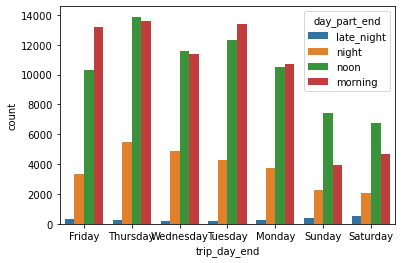

In [60]:
sb.countplot(data = df_clean, x = 'trip_day_end', hue = 'day_part_end')

morning trips peaks than other parts of the day except for the weekends where the noon trips peak

## Multivariate Exploration



I want to explore the effect of the part of day and the gender on the duration of the trip

C:\Users\PC\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


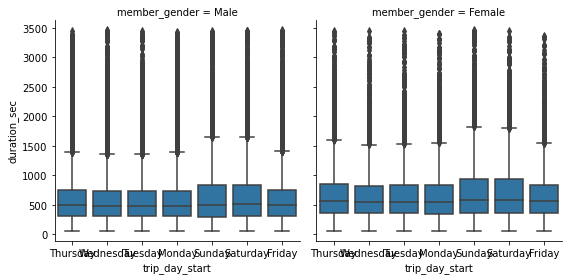

In [61]:
g = sb.FacetGrid(data = df_clean, col = 'member_gender', size = 4)
g.map(sb.boxplot, 'trip_day_start', 'duration_sec')

Trip duration for both male and females increase in weekends in comparisons with the other days of the week

C:\Users\PC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


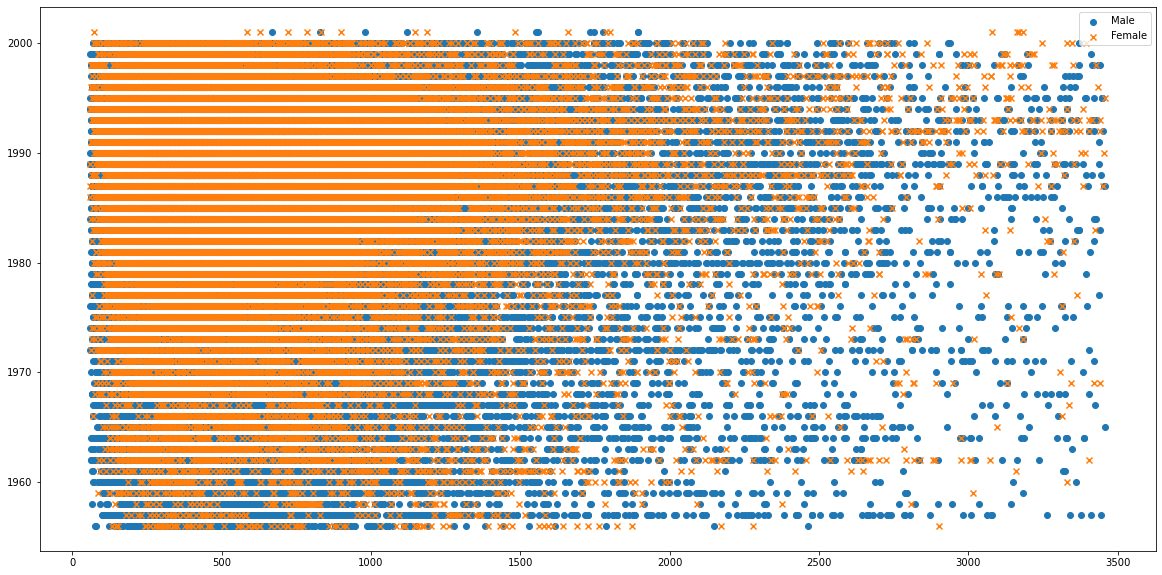

In [62]:
fig = plt.figure(figsize = [20,10])
cat_markers = [['Male', 'o'],
               ['Female', 'x']]

for cat, marker in cat_markers:
    df_cat = df_clean[df_clean['member_gender'] == cat]
    plt.scatter(data = df_cat, x = 'duration_sec', y = 'member_birth_year', marker = marker)
plt.legend(['Male','Female'])

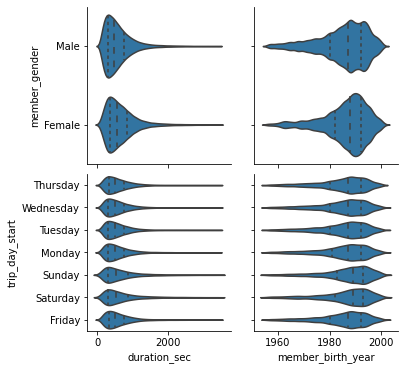

In [63]:
g = sb.PairGrid(data = df_clean, x_vars = ['duration_sec', 'member_birth_year'],
                y_vars = ['member_gender','trip_day_start'])
g.map(sb.violinplot, inner = 'quartile')

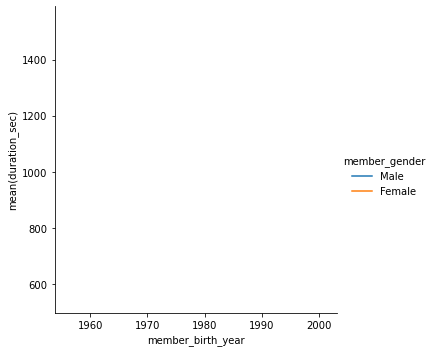

In [64]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

bin_edges = np.arange(0.25, df_clean['duration_sec'].max()+0.5, 0.5)
g = sb.FacetGrid(data = df_clean, hue = 'member_gender', height = 5)
g.map(mean_poly, "member_birth_year", "duration_sec", bins = bin_edges)
g.set_ylabels('mean(duration_sec)')
g.add_legend()

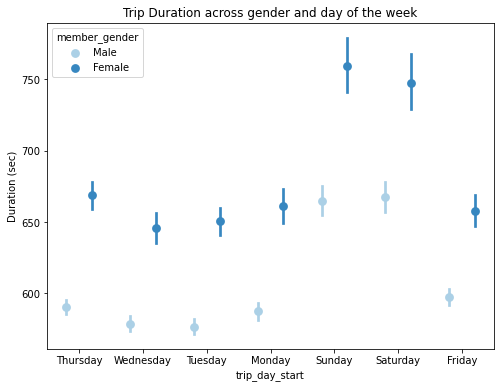

In [65]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_clean, x = 'trip_day_start', y = 'duration_sec', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across gender and day of the week')
plt.ylabel('Duration (sec)')
ax.set_yticklabels([],minor = True)
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> trip duration in both member genders peak in weekend and the duration in males' trip much longer than the female ones
> in younger ages the females and males almost have the same range of trip duration but as the age increase the difference between the trip duration increase
### Were there any interesting or surprising interactions between features?

> the relation ship between the trip duration and the kind of gender